In [135]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [136]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [137]:
#import dataset
df = pd.read_csv('./data/dataset.csv')
df.head()

,Unnamed: 0,home_last_3_P,home_last_3_OppP,home_last_3_FG,home_last_3_FGA,home_last_3_FG%,home_last_3_3P,home_last_3_3PA,home_last_3_3P%,home_last_3_FT,...,away_last_50_DeFG%,away_last_50_DTOV%,away_last_50_DDRB%,away_last_50_DFT/FGA,away_last_50_W,away_last_50_H,Date,Home_Team,Away_Team,Home_Team_Won
0,0,112.33,106.33,42.33,84.67,0.50,11.33,31.33,0.36,16.33,...,0.51,12.67,76.90,0.18,41.0,27.0,2022-02-03,ATL,PHO,True
1,0,110.67,114.33,41.33,90.67,0.46,11.33,31.33,0.34,16.67,...,0.53,11.26,77.10,0.21,18.0,26.0,2022-02-08,ATL,IND,True
2,0,113.67,113.33,44.00,92.67,0.48,10.33,29.00,0.34,15.33,...,0.53,11.25,75.18,0.17,19.0,26.0,2022-02-11,ATL,SAS,False
3,0,116.33,117.67,44.33,95.33,0.47,14.33,38.00,0.39,13.33,...,0.50,11.99,76.40,0.16,32.0,25.0,2022-02-15,ATL,CLE,True
4,0,120.67,112.33,43.00,89.00,0.49,13.33,31.33,0.42,21.33,...,0.54,13.79,74.56,0.21,27.0,24.0,2022-02-26,ATL,TOR,True


In [138]:
#We want clean the data and split up the input and output
target_column = "Home_Team_Won"
unneeded_columns = ["Date",	"Home_Team", "Away_Team"]

#remove first column from dataset
df = df.drop(df.columns[[0]],axis = 1)

#remove unneed_columns. These are columns that are in our dataset, but we don't want to feed into the model
#this is because they are categorical, we're only feeding our model numerical data
clean_df = df.drop(columns=unneeded_columns, axis=1)

# making new data frame with dropped NA values
clean_df = clean_df.dropna(axis=0, how='any')

#get the output rows of the dataset
output_rows = clean_df[target_column]

#remove output rows from the dataset
clean_df = clean_df.drop(columns=target_column, axis=1)

clean_df.head()

,home_last_3_P,home_last_3_OppP,home_last_3_FG,home_last_3_FGA,home_last_3_FG%,home_last_3_3P,home_last_3_3PA,home_last_3_3P%,home_last_3_FT,home_last_3_FTA,...,away_last_50_OeFG%,away_last_50_OTOV%,away_last_50_OORB%,away_last_50_OFT/FGA,away_last_50_DeFG%,away_last_50_DTOV%,away_last_50_DDRB%,away_last_50_DFT/FGA,away_last_50_W,away_last_50_H
0,112.33,106.33,42.33,84.67,0.50,11.33,31.33,0.36,16.33,22.67,...,0.54,11.55,22.63,0.18,0.51,12.67,76.90,0.18,41.0,27.0
1,110.67,114.33,41.33,90.67,0.46,11.33,31.33,0.34,16.67,19.67,...,0.52,11.71,25.02,0.18,0.53,11.26,77.10,0.21,18.0,26.0
2,113.67,113.33,44.00,92.67,0.48,10.33,29.00,0.34,15.33,17.67,...,0.52,10.79,24.07,0.15,0.53,11.25,75.18,0.17,19.0,26.0
3,116.33,117.67,44.33,95.33,0.47,14.33,38.00,0.39,13.33,15.33,...,0.54,12.56,23.80,0.19,0.50,11.99,76.40,0.16,32.0,25.0
4,120.67,112.33,43.00,89.00,0.49,13.33,31.33,0.42,21.33,27.33,...,0.51,10.69,27.32,0.18,0.54,13.79,74.56,0.21,27.0,24.0


In [139]:
#we are going to normalize our data. We want to feed our model normalized data anyways
scaler = MinMaxScaler()

scaler.fit(clean_df)
norm_df = scaler.transform(clean_df)

#we cleaned up our data, now we are going to split it and get it ready to feed into the model
X_train, X_test, y_train, y_test = train_test_split(norm_df, output_rows, test_size=0.25, random_state=0)

#now we have our training and testing dataset
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (1274, 228)
y_train: (1274,)
X_test: (425, 228)
y_test: (425,)


In [140]:
#add early stopping callback
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [141]:
#create and compile model

#we have a neural network with 1 input layer, 0 hidden layers, and 1 output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=228, activation='relu', input_shape=(228,)))
model.add(tf.keras.layers.Dense(units=456, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#add optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compile model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [142]:
#train the model
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback])

Epoch 1/100


40/40 [==============================] - 1s 2ms/step - loss: 0.6843 - accuracy: 0.5557
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6130
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6162
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6311
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6460
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6429
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6562
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6586
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6397
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.6397


In [143]:
#evaluate model
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

14/14 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6400
[0.6341338157653809, 0.6399999856948853]
Loss =  0.6341338157653809
Accuracy =  0.6399999856948853


14/14 [==============================] - 0s 1ms/step


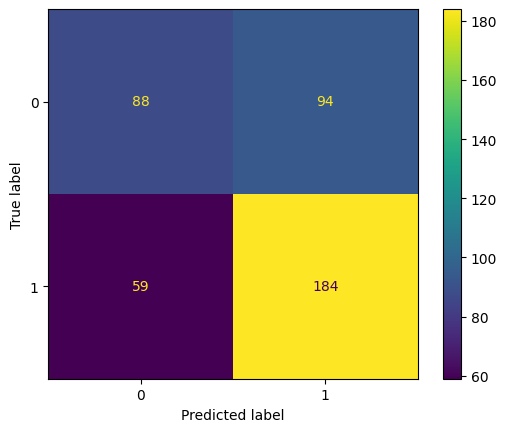

In [144]:
#prediction and evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


predicted = model.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()